# Breast Cancer detection

## load dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer

data=load_breast_cancer()

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
df=pd.DataFrame(np.c_[data['data'],data['target']],columns=np.append(data['feature_names'],'target'))

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [31]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [33]:
df.info() #check for data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

## EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


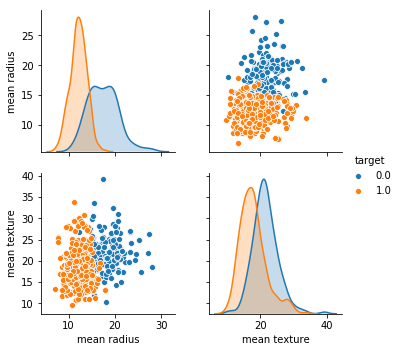

In [16]:
sns.pairplot(df, hue='target', vars=['mean radius','mean texture'])

0=>malignant i.e. cancerous
1=>benign


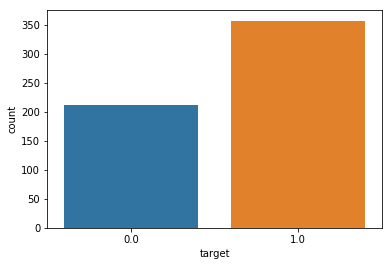

In [22]:
#counting the targets
print('0=>'+str(data['target_names'][0])+' i.e. cancerous\n1=>'+str(data['target_names'][1]))
sns.countplot(df.target)


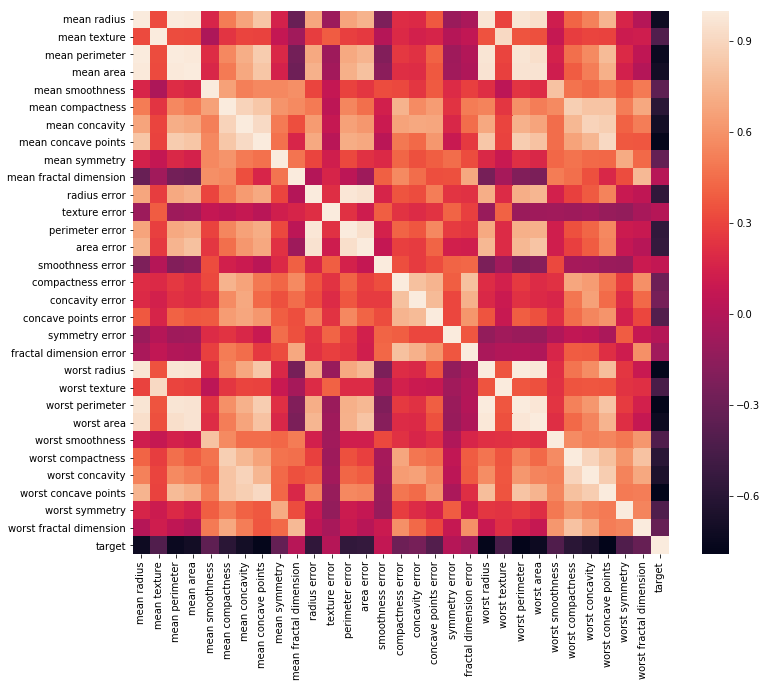

In [26]:
# correlation between features and target
rel=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(rel)

target=0 denotes cancerous tumor. So, the features that negatively co-relates with target i.e. increase in feature values results in decrease in target(0) indicate cancer.

## Model Building

In [27]:
#dividing the data into training and testing dataset
from sklearn.model_selection import train_test_split

In [30]:
X=df.drop(['target'],axis=1)
y=df['target']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=42)

In [34]:
# model building
from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression()
#training
model.fit(X_train,y_train)
pred=model.predict(X_test)
pred

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1.])

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classificationn_report

In [48]:
print(accuracy_score(pred,y_test)) # for fraction of correct predicted samples
print(accuracy_score(pred,y_test, normalize=False), end=' ') # for number of correct predicted samples
print('out of '+str(y_test.shape[0]))

0.9574468085106383
180 out of 188


In [51]:
print(confusion_matrix(pred,y_test))

[[ 63   4]
 [  4 117]]


In [55]:
cm_table=pd.crosstab(pred,y_test)
cm_table

target,0.0,1.0
row_0,,
0.0,63,4
1.0,4,117


In [57]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        67
         1.0       0.97      0.97      0.97       121

   micro avg       0.96      0.96      0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



## Support Vector Machine model

In [63]:
from sklearn.svm import SVC
svc_model=SVC(kernel='linear')

In [64]:
svc_model.fit(X_train,y_train)
svc_pred=svc_model.predict(X_test)
print(accuracy_score(svc_pred,y_test))

0.9574468085106383


Same accuracy score as Logistic regression model.

In [66]:
pd.crosstab(svc_pred,y_test)

target,0.0,1.0
row_0,,
0.0,63,4
1.0,4,117


## Decision Tree classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [69]:
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print(accuracy_score(dt_pred,y_test))

0.9095744680851063


In [70]:
pd.crosstab(dt_pred,y_test)

target,0.0,1.0
row_0,,
0.0,62,12
1.0,5,109
